In [17]:
####################
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:

#############

folder = '/data0/project/vortex/penven/SWAG/MOZAMBIQUE/'

nc = Dataset(folder + 'mozamb_swag36_grd.nc','r')
lon = nc.variables['lon_rho'][:,:]
lat = nc.variables['lat_rho'][:,:]
topo1 = nc.variables['h'][:,:]
mask1 = nc.variables['mask_rho'][:,:]; mask1[mask1==0] = np.nan
nc.close()



In [6]:
# Load data directly from srtm:


##########

nc = Dataset('/net/libra/local/tmp/1/gula/FORCING/TOPO/SRTM15_V2.6.nc','r')
lon_srtm26 = nc.variables['lon'][:]
lat_srtm26 = nc.variables['lat'][:]

# zoom in
i1s = np.nanargmin(lon_srtm26<lon.min())-1
i2s = np.nanargmax(lon_srtm26>lon.max())
j1s = np.nanargmin(lat_srtm26<lat.min())-1
j2s = np.nanargmax(lat_srtm26>lat.max())

lon_srtm26 = nc.variables['lon'][i1s:i2s+1]
lat_srtm26 = nc.variables['lat'][j1s:j2s+1]
topo_srtm26 = -nc.variables['z'][j1s:j2s+1,i1s:i2s+1]
nc.close()

##########


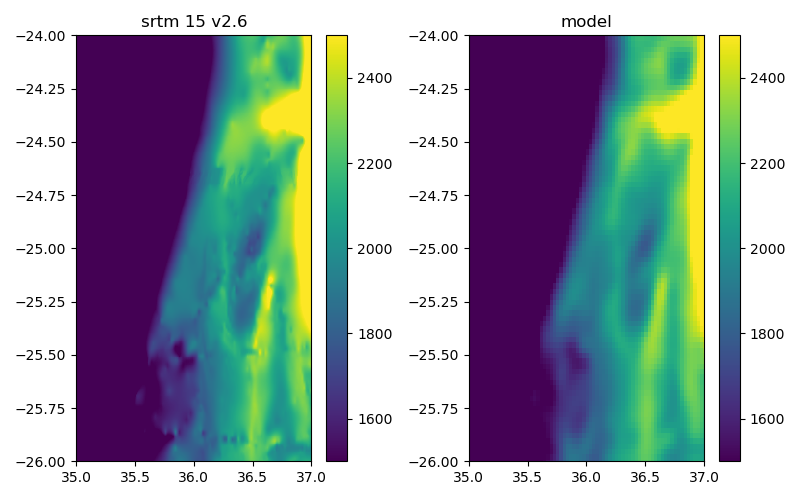

In [18]:
zoom = [35,37,-26,-24]
vmin = 1500; vmax=2500

####

fig = plt.figure(figsize=(8.0,5.0))
fig.set_tight_layout(1.)

ax =  plt.subplot(121);
plt.pcolormesh(lon_srtm26, lat_srtm26, topo_srtm26, vmin = vmin, vmax = vmax)
plt.title('srtm 15 v2.6'); plt.axis(zoom); plt.colorbar()

ax =  plt.subplot(122);
plt.pcolormesh(lon, lat, topo1 , vmin = vmin, vmax = vmax)
plt.title('model'); plt.axis(zoom); plt.colorbar()

plt.ion()
